In [1]:
import sklearn
print(sklearn.__version__)

1.2.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [3]:
class MyDummyClassifier(BaseEstimator):
    #fit()메소드는 아무것도 학습하지 않음.
    def fit(self,X,y=None):
        pass
    #predict() 메소드는 단순히 Sex feature가 1이면0, 그렇지 않으면 1로 예측
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred

In [4]:
# NULL 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거 
def drop_features(df):
    df.drop(['PassengerId',"Name",'Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df
#앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

#위에서 생성한 Dummy Classifier를 이용한 학습 예측 평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [6]:
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    #입력값으로 들어오는 X데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)
    
#사이킷런의 내장 데이터 셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print('### digits.data.shape: ', digits.data.shape)
print(digits.target)
print('### digits.target.shape', digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape:  (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape (1797,)


In [7]:
digits.target ==7

array([False, False, False, ..., False, False, False])

In [8]:
#digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False 이고 0으로 반환
y = (digits.target==7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=11)

In [9]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy classifier 학습 예측 정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


### confusion Matrix

In [10]:
# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]])

### 정밀도(precision) 과 재현율(recall)

In [11]:
print("정밀도: ", precision_score(y_test,fakepred))
print("재현율: ", recall_score(y_test,fakepred))

정밀도:  0.0
재현율:  0.0


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy,precision,recall))
    

In [13]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도: 0.7465, 재현율: 0.7681


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### precision/reacll Trade-off

* predict_proba() 메소드 확인

In [14]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])
# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result=np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.85131226 0.14868774]
 [0.89230466 0.10769534]
 [0.93314486 0.06685514]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.85131226 0.14868774 0.        ]
 [0.89230466 0.10769534 0.        ]
 [0.93314486 0.06685514 0.        ]]


### Binarizer 활용

In [15]:
X = [[1,-1,2],
    [2,0,0,],
    [0,1.1,1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환

binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

In [16]:
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold=0.5
# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도: 0.7465, 재현율: 0.7681


#### 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환


In [17]:
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold=0.4
# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차행렬
[[86 24]
 [13 56]]
정확도: 0.7933, 정밀도: 0.7000, 재현율: 0.8116


In [18]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장

thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체내의 값을 차례로 iteration 하면서 Evaluation수행
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1), thresholds)

임계값:  0.4
오차행렬
[[86 24]
 [13 56]]
정확도: 0.7933, 정밀도: 0.7000, 재현율: 0.8116
임계값:  0.45
오차행렬
[[91 19]
 [14 55]]
정확도: 0.8156, 정밀도: 0.7432, 재현율: 0.7971
임계값:  0.5
오차행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도: 0.7465, 재현율: 0.7681
임계값:  0.55
오차행렬
[[97 13]
 [18 51]]
정확도: 0.8268, 정밀도: 0.7969, 재현율: 0.7391
임계값:  0.6
오차행렬
[[99 11]
 [25 44]]
정확도: 0.7989, 정밀도: 0.8000, 재현율: 0.6377


In [19]:
# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:',thresholds.shape)
print('반환된 precisions 배열의 Shape:',precisions.shape)
print('반환된 recalls 배열의 Shape:',recalls.shape)

print("thresholds 5 sample:",thresholds[:5])
print("precisions 5 sample:",precisions[:5])
print("recalls 5 sample:",recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
thr_index=np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값: ',np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (172,)
반환된 precisions 배열의 Shape: (173,)
반환된 recalls 배열의 Shape: (173,)
thresholds 5 sample: [0.02934279 0.04195178 0.04555249 0.04598709 0.04604941]
precisions 5 sample: [0.38547486 0.38764045 0.38983051 0.39204545 0.39428571]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값:  [0.03 0.09 0.11 0.14 0.17 0.24 0.36 0.53 0.63 0.76 0.89 0.95]
샘플 임계값별 정밀도:  [0.385 0.409 0.448 0.496 0.562 0.629 0.695 0.761 0.808 0.919 1.    1.   ]
샘플 임계값별 재현율:  [1.    0.971 0.942 0.928 0.913 0.884 0.826 0.739 0.609 0.493 0.319 0.101]


### 임계값의 변경에 따른 정밀도 - 재현율 변화곡선

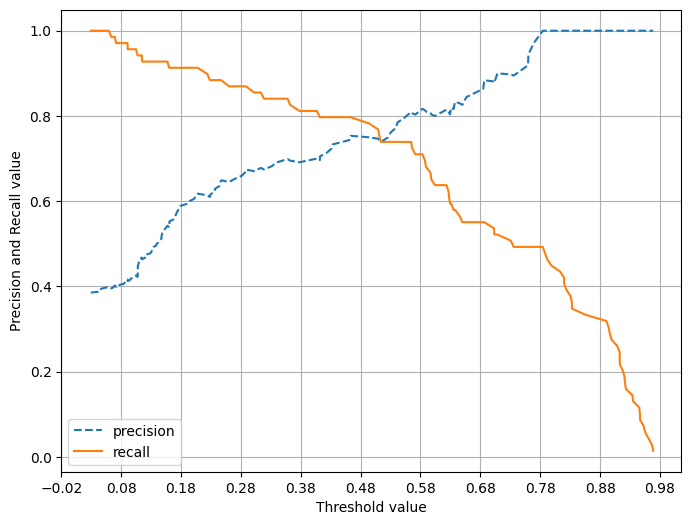

In [20]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

### F1 Score

In [21]:
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7571


In [22]:
# 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    # f1 추가
    f1 = f1_score(y_test , pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy,precision,recall,f1))
    
thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1), thresholds)

임계값:  0.4
오차행렬
[[86 24]
 [13 56]]
정확도: 0.7933, 정밀도: 0.7000, 재현율: 0.8116, F1:0.7517
임계값:  0.45
오차행렬
[[91 19]
 [14 55]]
정확도: 0.8156, 정밀도: 0.7432, 재현율: 0.7971, F1:0.7692
임계값:  0.5
오차행렬
[[92 18]
 [16 53]]
정확도: 0.8101, 정밀도: 0.7465, 재현율: 0.7681, F1:0.7571
임계값:  0.55
오차행렬
[[97 13]
 [18 51]]
정확도: 0.8268, 정밀도: 0.7969, 재현율: 0.7391, F1:0.7669
임계값:  0.6
오차행렬
[[99 11]
 [25 44]]
정확도: 0.7989, 정밀도: 0.8000, 재현율: 0.6377, F1:0.7097


### ROC Curve 와 AUC

In [23]:
# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]
fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)

# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:',thr_index)
print('샘플 index로 추출한 임곗값: ',np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:  [0.97 0.69 0.63 0.56 0.38 0.29 0.16 0.15 0.11 0.09 0.03]
샘플 임곗값별 FPR:  [0.    0.045 0.091 0.109 0.227 0.264 0.464 0.518 0.727 0.855 1.   ]
샘플 임곗값별 TPR:  [0.014 0.551 0.594 0.739 0.812 0.87  0.913 0.928 0.942 0.971 1.   ]


In [24]:
# 레이블 값이 1일때의 예측 확률을 추출

pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]
print('max predict_proba: ', np.max(pred_proba_class1))

fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘프로 10건만 추출하되 임계값을 5 step으로 추출

thr_index=np.arange(0,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값: ',np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR: ',np.round(tprs[thr_index],3))

max predict_proba:  0.9686682724837214
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.7  0.63 0.57 0.41 0.3  0.21 0.16 0.11 0.09 0.06]
샘플 임곗값별 FPR:  [0.    0.045 0.082 0.109 0.218 0.264 0.355 0.5   0.718 0.855 0.945]
샘플 임곗값별 TPR:  [0.    0.522 0.594 0.71  0.812 0.855 0.913 0.928 0.942 0.957 1.   ]


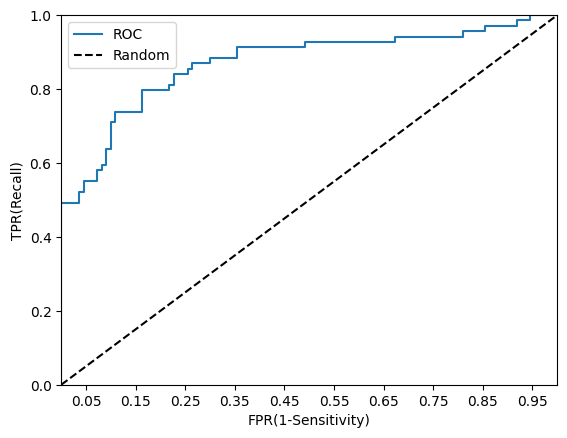

In [25]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    
    #roc curve 를 plot 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    # FPR X축의 Scale을 0.1단위로 변경, X,Y 축명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [26]:
### roc_auc_score(y_test, y_score)로 y_score는 predict_proba()로 호출된 예측 확률 ndarray중 Positive

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8706


In [27]:
# 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    # f1 추가
    f1 = f1_score(y_test , pred)
    # ROC_AUC 추가
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))
